<center>
<h1> SOLUCIÓN TAREA 16- Probabilistic Generative Model para K-clases
</h1>
<h3>Diego Godoy Rojas & Luis Carlos Diaz </h3>
</center>

Importamos las librerias necesarias para trabajar:

In [1]:
!pip install plotly_express
import numpy as np 
import pandas as pd
from sklearn import datasets
import plotly_express as px
import seaborn as sns                                                           
from scipy import stats                                                         
import matplotlib.pyplot as plt                                            
import os
import warnings
warnings.filterwarnings("ignore")
sns.set(style="ticks")  

Cargamos el conjunto de datos con el que vamos a trabajar la clasificación:

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
px.histogram(iris, x = 'sepallength',color = 'class',nbins=20)

Como podemos observar en esta ocasión contamos con tres clases en nuestro conjunto de datos.

Hallamos la proobabilidad de clase individual lo cual es trivial:

In [5]:
p_setosa = len(iris[iris['class']=='Iris-setosa'])/len(iris)
p_versicolor = len(iris[iris['class']=='Iris-versicolor'])/len(iris)
p_virginica = len(iris[iris['class']=='Iris-virginica'])/len(iris)
print(p_setosa,p_versicolor,p_virginica)

0.3333333333333333 0.3333333333333333 0.3333333333333333


Aquí ajustamos una distribución de probabilidad sobre nuestra X. Asumimos aquí que los datos de X se distribuyen normalmente. Y por lo tanto podemos encontrar la media y la varianza de la muestra para estas tres distribuciones (ya que tenemos tres clases) empleando una sola variable:

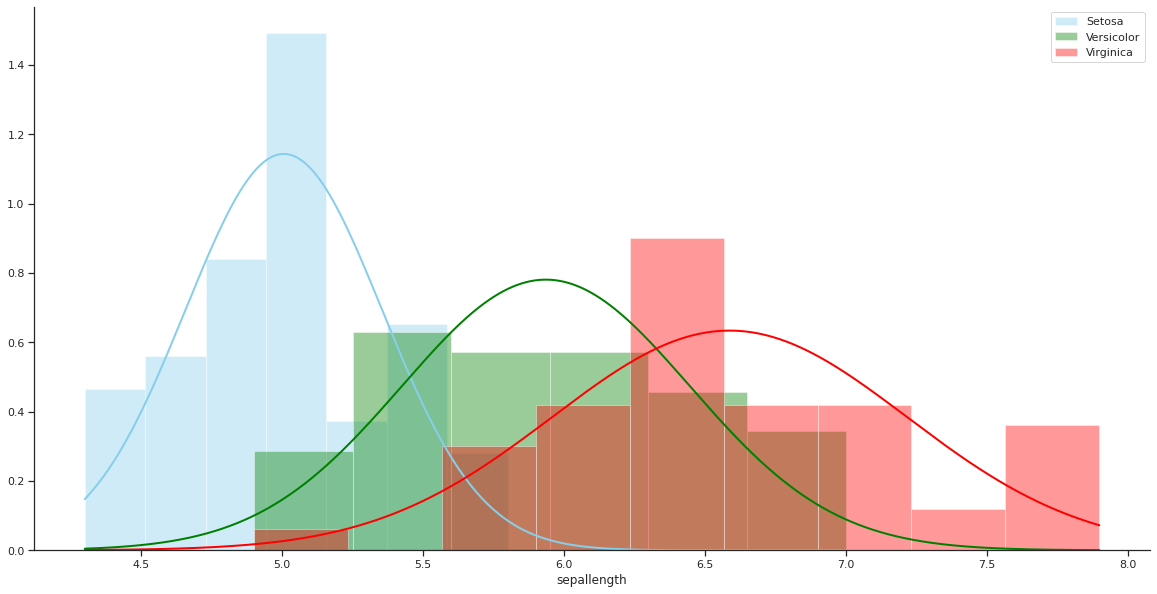

In [6]:
# calculate the pdf over a range of values
xx = np.arange(min(iris['sepallength']), max(iris['sepallength']),0.001)

x = iris[iris['class']=='Iris-setosa']['sepallength']
sns.distplot(x, kde = False, norm_hist=True,color='skyblue',label = 'Setosa')
yy = stats.norm.pdf(xx,loc=np.mean(x),scale=np.std(x))
plt.plot(xx, yy, 'skyblue', lw=2) 

x = iris[iris['class']=='Iris-versicolor']['sepallength']
sns.distplot(x, kde = False, norm_hist=True,color='green',label = 'Versicolor')
yy = stats.norm.pdf(xx,loc=np.mean(x),scale=np.std(x))
plt.plot(xx, yy, 'green', lw=2) 

x = iris[iris['class']=='Iris-virginica']['sepallength']
g = sns.distplot(x, kde = False, norm_hist=True,color='red',label = 'Virginica')
yy = stats.norm.pdf(xx,loc=np.mean(x),scale=np.std(x))
plt.plot(xx, yy, 'red', lw=2) 
sns.despine()
g.figure.set_size_inches(20,10)
g.legend()

Hallamos la media y desviación estandar de cada clase:

In [7]:
x = iris[iris['class']=='Iris-setosa']['sepallength']
print(np.mean(x),np.std(x))

x = iris[iris['class']=='Iris-versicolor']['sepallength']
print(np.mean(x),np.std(x))

x = iris[iris['class']=='Iris-virginica']['sepallength']
print(np.mean(x),np.std(x))

5.005999999999999 0.348946987377739
5.936 0.5109833656783752
6.587999999999998 0.6294886813914925


Si ahora empleamos dos variables de nuestro conjunto de datos:

In [8]:
px.scatter(iris, 'sepallength', 'petallength',color = 'class')

A continuación empleamos el modelo "Probabilistic Generative" descrito por Bishop en su libro Pattern Recognition and Machine Learning:

In [9]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

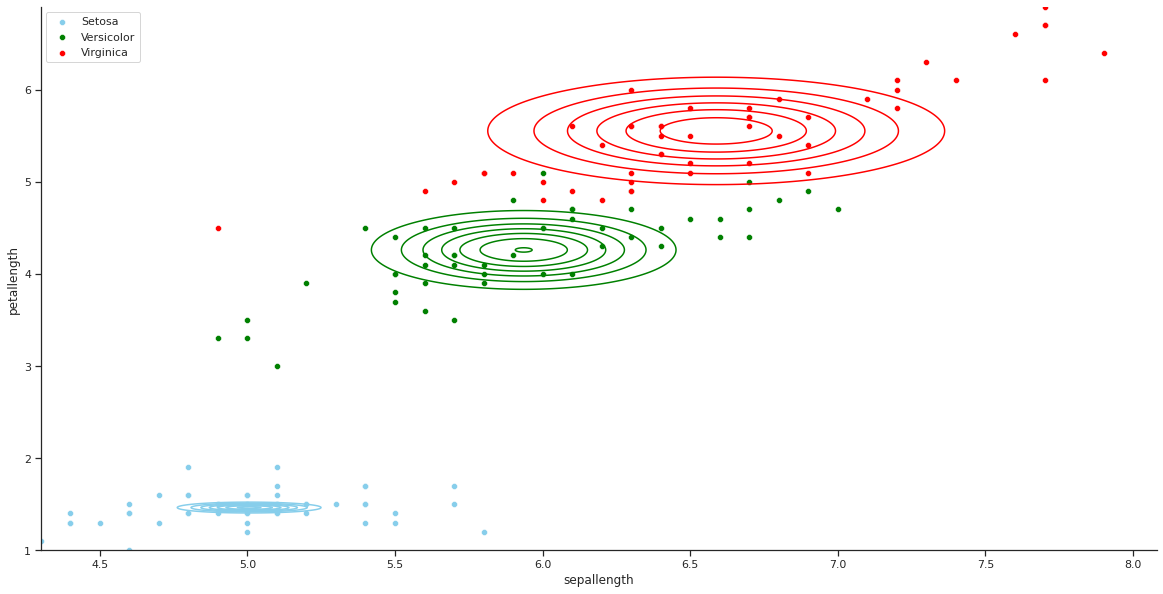

In [10]:
# SETOSA
x1 = iris[iris['class']=='Iris-setosa']['sepallength']
x2 = iris[iris['class']=='Iris-setosa']['petallength']
sns.scatterplot(x1,x2, color='skyblue',label = 'Setosa')

mu_x1=np.mean(x1)
mu_x2=np.mean(x2)
sigma_x1=np.std(x1)**2
sigma_x2=np.std(x2)**2
xx = np.arange(min(x1), max(x1),0.001)
yy = np.arange(min(x2), max(x2),0.001)

X, Y = np.meshgrid(xx, yy)
Z = bivariate_normal(X,Y, sigma_x1, sigma_x2, mu_x1, mu_x2)
plt.contour(X,Y,Z,colors='skyblue')

# VERSICOLOR
x1 = iris[iris['class']=='Iris-versicolor']['sepallength']
x2 = iris[iris['class']=='Iris-versicolor']['petallength']
sns.scatterplot(x1,x2,color='green',label = 'Versicolor')

mu_x1=np.mean(x1)
mu_x2=np.mean(x2)
sigma_x1=np.std(x1)**2
sigma_x2=np.std(x2)**2
xx = np.arange(min(x1), max(x1),0.001)
yy = np.arange(min(x2), max(x2),0.001)

X, Y = np.meshgrid(xx, yy)
Z = bivariate_normal(X,Y, sigma_x1, sigma_x2, mu_x1, mu_x2)
plt.contour(X,Y,Z,colors='green')

# VIRGINICA
x1 = iris[iris['class']=='Iris-virginica']['sepallength']
x2 = iris[iris['class']=='Iris-virginica']['petallength']
g = sns.scatterplot(x1, x2, color='red',label = 'Virginica')

mu_x1=np.mean(x1)
mu_x2=np.mean(x2)
sigma_x1=np.std(x1)**2
sigma_x2=np.std(x2)**2
xx = np.arange(min(x1), max(x1),0.001)
yy = np.arange(min(x2), max(x2),0.001)

X, Y = np.meshgrid(xx, yy)
Z = bivariate_normal(X,Y, sigma_x1, sigma_x2, mu_x1, mu_x2)
plt.contour(X,Y,Z,colors='red')


sns.despine()
g.figure.set_size_inches(20,10)
g.legend()


El gráfico muestra las densidades condicionales de clase para las tres clases, cada una tiene una distribución gaussiana de color rojo, verde y azul respectivamente y una matriz de covarianza propia.